In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

units_per_pixel = 3 # cm

%matplotlib inline

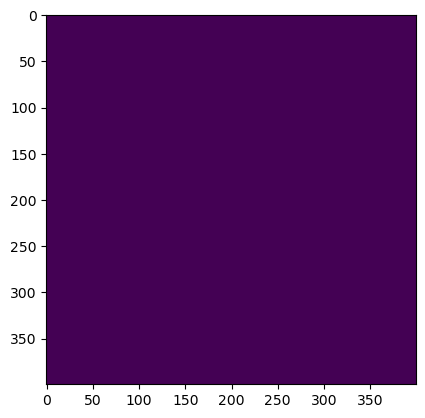

In [12]:
img = np.zeros((400, 400), dtype=np.uint8)
plt.imshow(img)

In [7]:
disk((200, 200), 100)

(array([101, 101, 101, ..., 299, 299, 299]),
 array([186, 187, 188, ..., 212, 213, 214]))

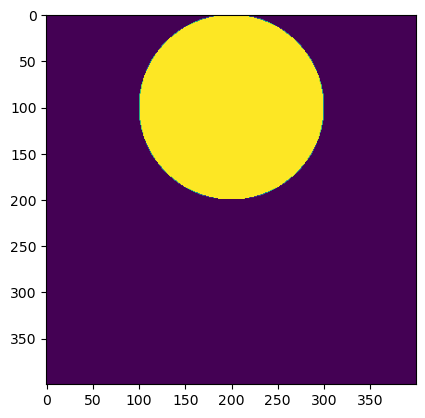

In [13]:
rr, cc = disk((100, 200), 100, shape=img.shape)
img[rr, cc] = 1
plt.imshow(img)

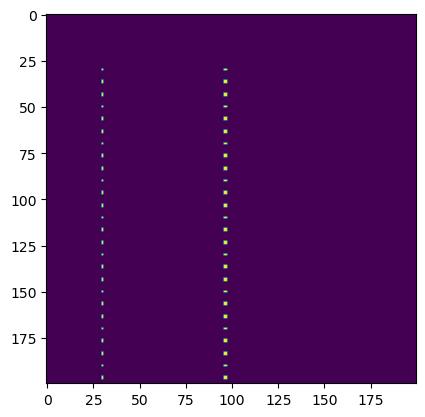

In [2]:
blank_barn = np.zeros((200, 200), dtype=np.uint8)
num_rows = 2
num_nipples = 30
distance_between_lines = 200 # cm
distance_between_nipples = 20 # cm
nipple_points = []

x_offset = 30 # cm
y_offset = 30 # cm

pixels_between_lines = distance_between_lines / units_per_pixel
pixels_between_nipples = distance_between_nipples / units_per_pixel

for i in range(num_rows):
    for j in range(num_nipples):
        nipple_points.append((j * pixels_between_nipples + y_offset, i * pixels_between_lines + x_offset))

for nipple in nipple_points:
    rr, cc = disk(nipple, 1, shape=blank_barn.shape)
    blank_barn[rr, cc] = 1

plt.imshow(blank_barn)